# Multilayer Perceptrons

In this chapter, begin to work with truly "deep" machine learning models, with multiple connected layers. Higher risk of overfitting with deep networks so will revisit the concepts of regularisation and generalisation.

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

## Hidden Layers

In our previous examples, our model mapped inputs directly to outputs via a single affine transformation (linear plus bias), followed by a softmax operation to coerce the outputs into a valid probability distribution. The key issue with this is that the assumption of _linearity_ is a strong (and often incorrect) one. 

### Limitations of Linear Models

Linearity implies the weaker assumption of monotonicity, that is to say that an increase/decrease in our feature/covariate must always correspond to either an increase or decrease in the prediction (posive or negative weight). Many situations where this doesn't make sense, e.g. body temperature as a feature for predicting health of a patient, too high and too low are _both_ bad. 

For image recognition, this assumption is akin to saying that an individual pixel being brighter/darker must always be indiciative of whether an image is, say, a cat or a dog. Perhaps this is appropriate for charaacter recognition, but certainly not for more complex real-world scenarios. 

While for the temperature example, we could conceivably change our feature to be, say, the _distance_ from a healthy temperature (e.g. 37C), it's far less obvious how such feature engineering could be performed for image recognition. In deep neural networks, we learn this "feature engineering" so that we have a representation which can be transformed via a final linear predictor that acts on that representation. 

### Incorporating Hidden Layers

We can overcome the limitations of linearity by incorporating hidden layers. The simplest way of doing this is to have a series of fully-connected layers. We can imagine that the L-1 layers just serve to produce a _representation_ of the input data, which is transformed by the final output layer as a linear predictor. These are often called multilayer perceptron architectures. 

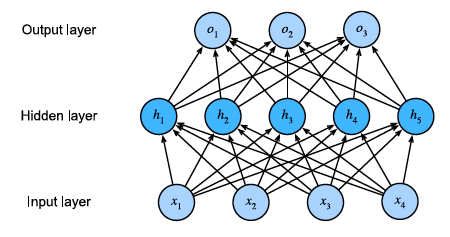

In the above example, 4 inputs, 3 outputs with 5 units in the hidden layer. 

### From Linear to Non-Linear

As before, denote the matrix $\mathbf{X} \in \mathbb{R} ^ {n \times d}$ as a minibatch matrix of $n$ examples, each containing $d$ features. For a one-hidden-layer neural network with $h$ units in the hidden layer, we denote $\mathbf{H} \in \mathbb{R} ^ {n \times h}$ as the outputs of the hidden layer. 

Since the layers are fully connected, we have hidden layer weights $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ and biases $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$. We also have output layer weights $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$ (q is the number of output features) and biases $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. 

We can then compute the outputs $\mathbf{O} \in \mathbb{R}^{n \times q}$ as:

$$ \mathbf{H} = \mathbf{X}\mathbf{W}^{(1)} + \mathbf{b}^{(1)} $$
$$ \mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)} $$

Howver, in this example, although we are tracking more variables and parameters, the results are still just affine transformations of the parameters, so we still have a linear model! Generally, an affine function of an affine function is still just an affine function - and our linear model was already capable of representing any affine function we may have wished to represent. 

In order to realise the potential of the model we have just designed, an extra ingredient is required to add non-linearity; an activation function $\sigma$. A popular choice of activation function is the ReLU (rectified linear unit) $\sigma(x) = max(0, x)$. The outputs of activation functions are called _activations_. 

$$ \mathbf{H} = \sigma(\mathbf{X}\mathbf{W}^{(1)} + \mathbf{b}^{(1)}) $$
$$ \mathbf{O} = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)} $$

We can continue stacking layers like this to build ever more generalised multilayer perceptrons.

### Universal Approximators

Theoretically, given just one hidden layer, and enough nodes (though potentially ubsurdly many) we can model any function we want. Of course, in practise this never quite works out.

## Activation Functions

Broadly decide whether or not a neuron should be activated by calculating the weighted sum of the inputs to that neuron and applying a further bias to it. They are differentiable and add nonlinearity to our model.

### ReLU Function

Common choice due to simplicity of implementation and good performance on a wide variety of tasks. 

$$ ReLU(x) = max((0, x)) $$

Informally, only retains positive values of x. 

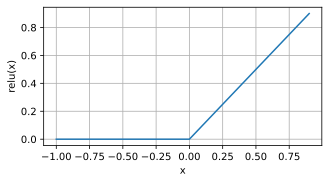

In [5]:
x = torch.arange(-1, 1, 0.1, requires_grad=True)

y = torch.relu(x)

d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

Derivative 0 if x LT 0, 1 if x GT 1. Non-differentiable at 0 technically, but by convention say that the derivative is 0 when the value of x iszero. 

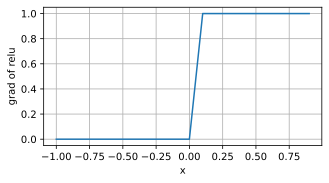

In [6]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

ReLU is popular precisely because of its simplicity, which means that it behaves very predictably when computing gradients and performing optimisations. It also has a number of variations, including the parameterised rectified linear unit (pReLU). 

$$ pReLU(x) = max(0, x) + \alpha min(0, x) $$

### Sigmoid Function

A _sigmoid_ function maps any input in the range [-inf, inf] to the interval [0, 1] and for that reason is often called a "squashing function" 

$$ sigmoid(x) = \frac{1}{1 + exp(-x))} $$

Sigmoid gained popularity because it is a smooth, differentiable equivalent to a thresholding activation (which is either 0 or 1 depending on some threshold). Broadly replaced by simpler and more easily trained ReLU for most modern applications with hidden layers. This is largely due to the fact that for the sigmoid function, the gradient vanishes to 0 for both large positive and large negative values

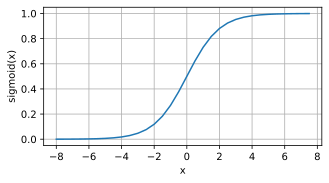

In [10]:
x = torch.arange(-8, 8, 0.5, requires_grad=True)
y = torch.sigmoid(x)

d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

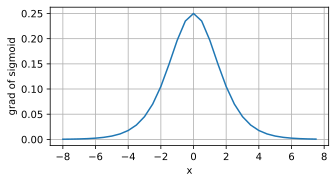

In [12]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### Tanh Function

Like the sigmoid function, the Tanh function also squashes its inputs, but into a range [-1, 1]. 

$$ tanh(x) = \frac{1 - exp(2x)}{1 + exp(2x)} $$

When the value of x is close to 0, the transformation is approximately linear. Tanh function has point symmetry around the origin of the coordinate system. 

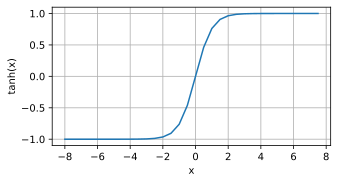

In [14]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

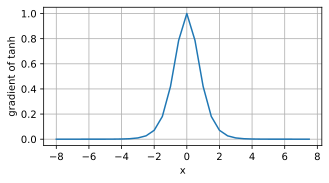

In [20]:
x.grad.data.zero_()
y.backward(torch.ones(len(x)), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'gradient of tanh', figsize=(5, 2.5))

research into activationf functions hasn't stopped, e.g. the GELU (Gaussian error linear unit) and the Swich activation function can yield better results in many cases. 